In [1]:
#Importing Requierd Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# for Interactive Shells
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#removing warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# reading the csv file
df = pd.read_csv('../input/avocado-prices/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# we have an extra index column. As it will not be required so we will remove it
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [5]:
# checking for null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
#duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    print('There are no duplicated entries.')
else:
    print(f'There are {duplicates} duplicates.')

There are 0 duplicates.


In [7]:
# as few column data types are wrong, so lets fix that
for i in df.columns:
    if i == 'date':
        df[i] = df[i].astype('datetime64[ns]')
    elif df[i].dtype == 'object':
        df[i] = df[i].astype('category')

numeric_columns = ['AveragePrice', 'Total Volume',
                   '4046', '4225', '4770',
                   'Total Bags', 'Small Bags',
                   'Large Bags', 'XLarge Bags']
categorical_columns = ['region', 'type']
data_columns = ['Data', 'year']
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Date          18249 non-null  category
 1   AveragePrice  18249 non-null  float64 
 2   Total Volume  18249 non-null  float64 
 3   4046          18249 non-null  float64 
 4   4225          18249 non-null  float64 
 5   4770          18249 non-null  float64 
 6   Total Bags    18249 non-null  float64 
 7   Small Bags    18249 non-null  float64 
 8   Large Bags    18249 non-null  float64 
 9   XLarge Bags   18249 non-null  float64 
 10  type          18249 non-null  category
 11  year          18249 non-null  int64   
 12  region        18249 non-null  category
dtypes: category(3), float64(9), int64(1)
memory usage: 1.5 MB


None

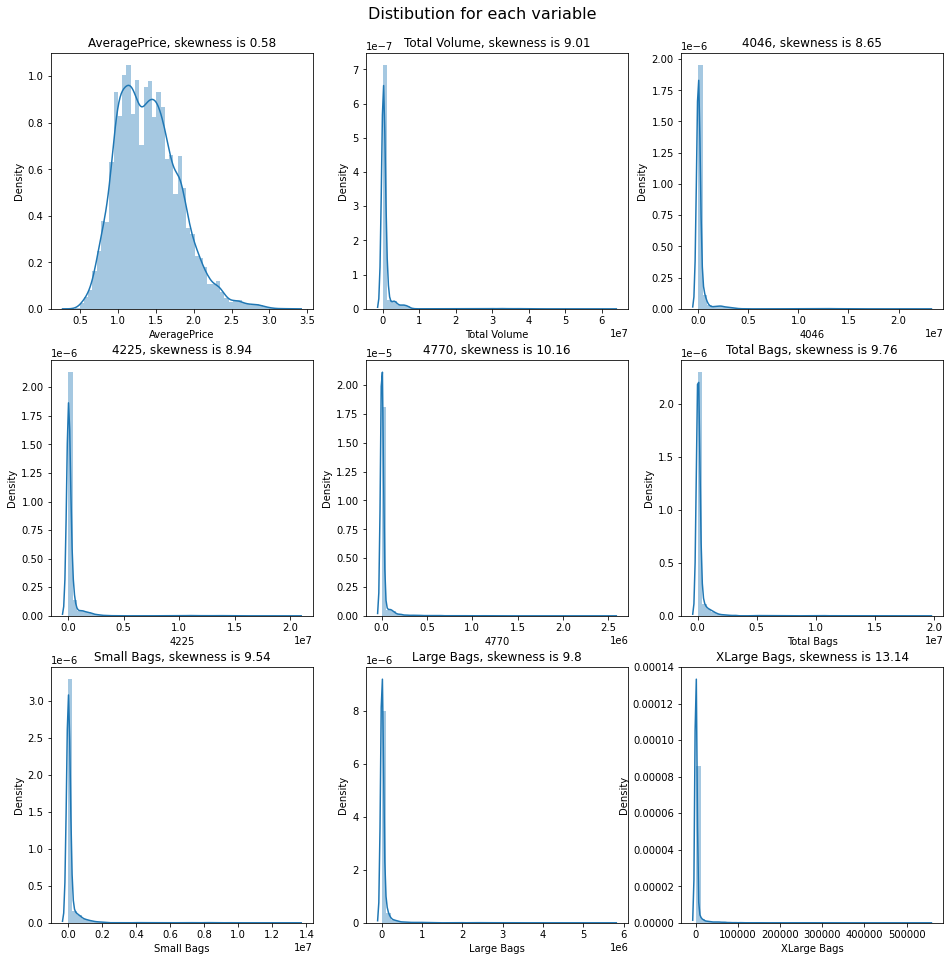

In [8]:
#  Getting known with the kind of distrubutions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=0.92, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.distplot(dataset[data], ax=axs[i])
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
dist_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=3, suptitle='Distibution for each variable')

> all features are skewed to the left, there is no Normal Distribution. Let's examine outliers with the use of boxplots.

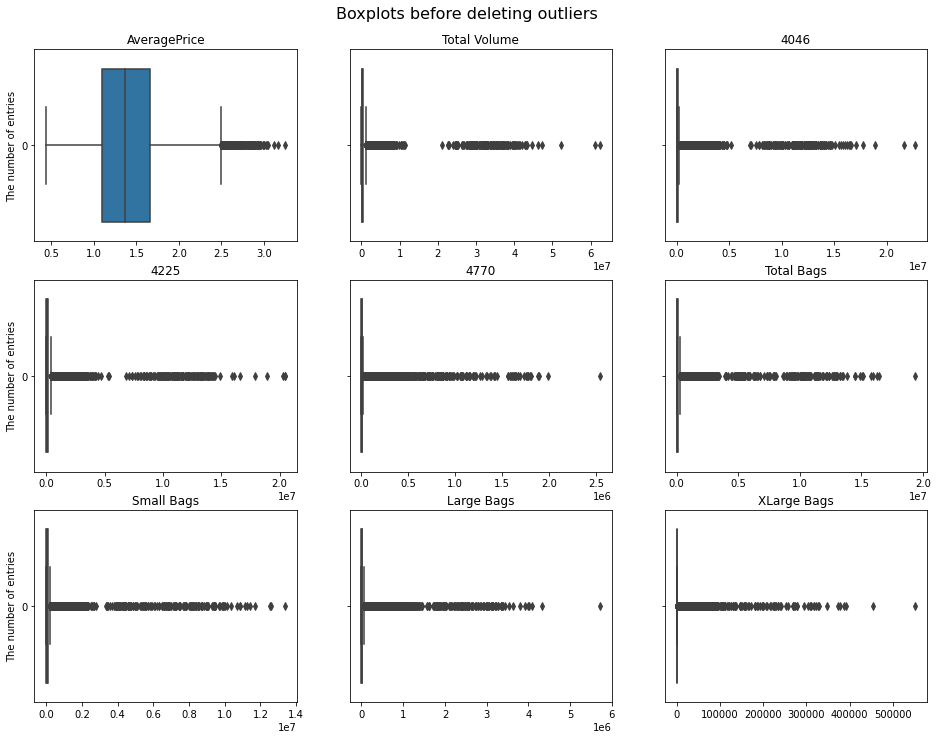

In [9]:
# outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot( data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=3, suptitle='Boxplots before deleting outliers')

> For Skewed distributions we'll use Inter-Quartile Range (IQR) proximity rule.

In [10]:
# deleting outliers
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df_filtered = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) |(df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df_filtered.shape)

Here we will get IQR for each column
 AveragePrice         0.56
Total Volume    422123.71
4046            110166.13
4225            147198.08
4770              6243.42
Total Bags      105694.73
Small Bags       80488.25
Large Bags       21901.78
XLarge Bags        132.50
dtype: float64


(11538, 13)

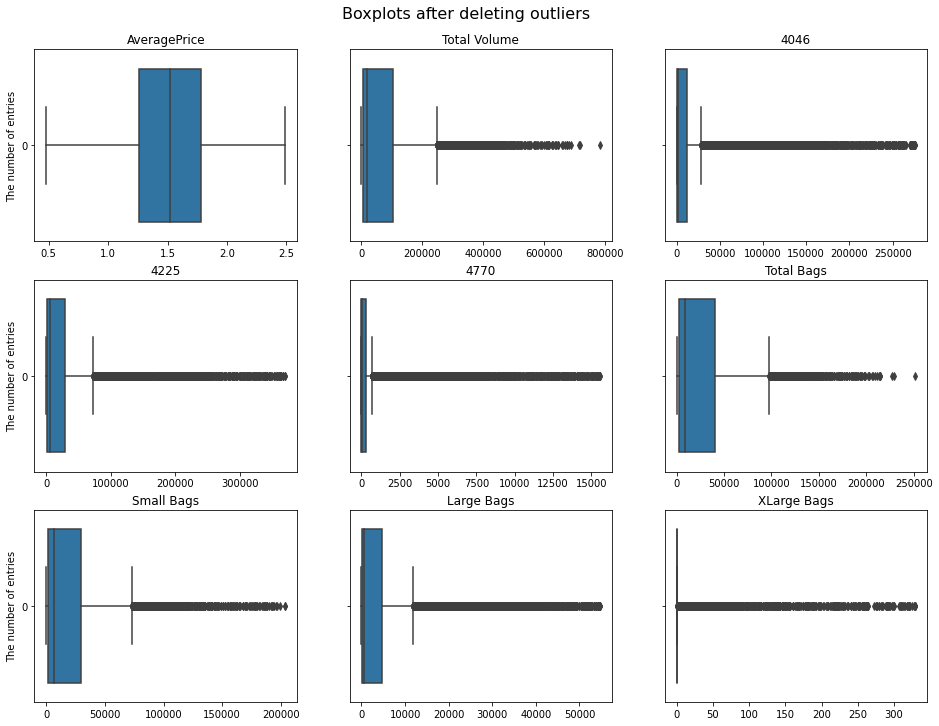

In [11]:
boxplots_custom(dataset=df_filtered, 
                columns_list=numeric_columns, 
                rows=3, cols=3, suptitle='Boxplots after deleting outliers')

> Looks much better now! But nevertheless we see some outliers even in filtered data. It will be great to scale the features at the step of building model. We'll use filtered data further

In [12]:
# We already have information about day and year of price scanning so lets add week and month columns
df_filtered['month'] = df_filtered['Date'].astype('datetime64[M]')
df_filtered['week'] = df_filtered['Date'].astype('datetime64[W]')
bins = [0.48, 1.52, 1.78, 1.9, 2.49]
labels = ["low","mean","high",'expensive']
df_filtered['price_types'] = pd.cut(df['AveragePrice'], bins=bins, labels=labels)
df_filtered.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,week,price_types
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12-01,2015-12-24,low
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12-01,2015-12-17,low
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12-01,2015-12-10,low
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12-01,2015-12-03,low
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11-01,2015-11-26,low


> Let's create new dataset with avarage avocado price per day, month and year. After that we'll create lineplots with the use of plotly.express and analyze it

In [13]:
# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2, subplot_titles=("Daily average prices", "Weekly average prices",
                                    "Monthly average prices", "Average prices per years")
                                        )

datasets = []
for i in ['Date','week','month','year']:
    datasets.append(round(df_filtered.groupby(i)['AveragePrice'].mean().reset_index(),3))
r, c = 1,1 #rows, cols
    
for i, d in enumerate(datasets):
    # Add traces
    fig.add_trace(go.Scatter(x=d.iloc[:,0], y=d['AveragePrice']), row=r, col=c)
    fig.update_xaxes(title_text='Per ' + d.iloc[:,0].name,row=r, col=c)
    fig.update_yaxes(title_text="The sum of avarage price", row=r, col=c)
    if i == 1:
        r, c = 2, 1
    else:
        c += 1
    
# Update title and height
fig.update_layout(showlegend=False, title_text="Customizing Subplot Axes", height=700)

fig.show()

In [14]:
# Initialize figure with subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Daily average prices", 
                                    "Monthly average prices"))

datasets = []
for i in ['Date','month']:
    for j in ['conventional', 'organic']:
        datasets.append(round(df_filtered.query('type == @j').groupby(i)['AveragePrice'].mean().reset_index(),3))
r, c = 1,1
legend_ = ['conventional', 'organic']
for i, d in enumerate(datasets):
    # Add traces
    fig.add_trace(go.Scatter(x=d.iloc[:,0], y=d['AveragePrice'], name=legend_[i%2]+' per ' + d.iloc[:,0].name), row=r, col=c)
    fig.update_xaxes(title_text='Per ' + d.iloc[:,0].name,row=r, col=c)
    fig.update_yaxes(title_text="The sum of avarage price", row=r, col=c)
    if i == 1:
        c += 1
    
# Update title and height
fig.update_layout(showlegend=True, title_text="Daily and monthly avarage prices for conventional and organic types", height=700)

fig.show()

**Observations** :
From the lineplots above:
- At the daily and monthly average price we see a decline in price in January 2016-2017. We can conclude that in winter avocados are not in demand, or there were a too much avocados in shops;
- At the average price per year chart we see a steady decline from 2015 to 2016.
- After that there is an increase, the peak is in 2017 year.

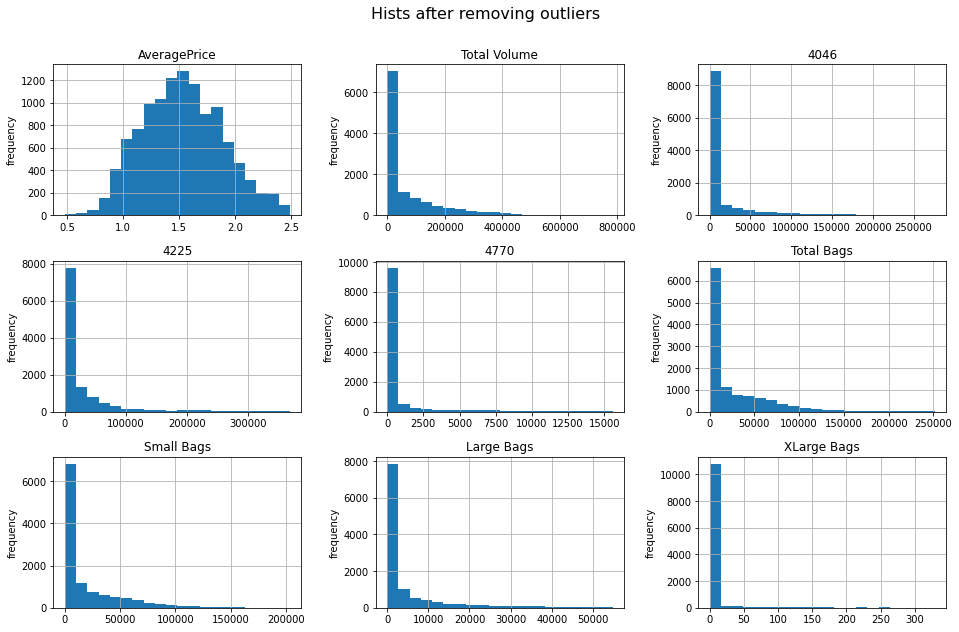

In [15]:
# histograms
param_graphs = df_filtered.hist(numeric_columns, figsize=(16, 10), bins=20)
plt.suptitle("Hists after removing outliers", y=0.96, size=16)
for axis in param_graphs.flatten():
    axis.set_ylabel('frequency')
plt.show()


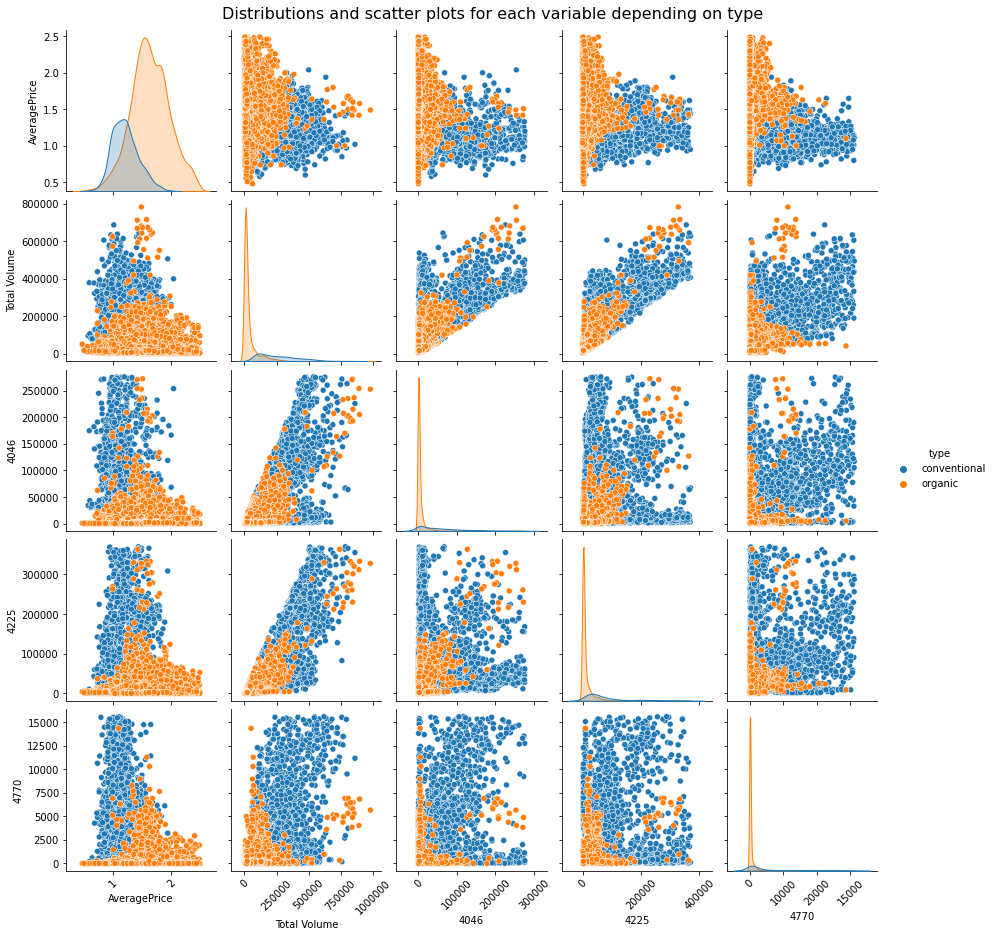

In [16]:
# Distributions and scatter plot for each variable according to type variable

columns_for_research = ['AveragePrice', 'Total Volume', '4046','4225','4770', 'type']
g = sns.pairplot(data=df_filtered[columns_for_research], hue="type")
g.fig.suptitle("Distributions and scatter plots for each variable depending on type", y=1.01, size=16)
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [17]:
# bar plots
ten_largest_volume_regions = df_filtered.groupby(['region'])['Total Volume'].sum().sort_values(ascending=False).reset_index().head(10)
fig = px.bar(ten_largest_volume_regions,x='region', y='Total Volume', title='Top ten regions with the greatest total volume over the time')
fig.show()

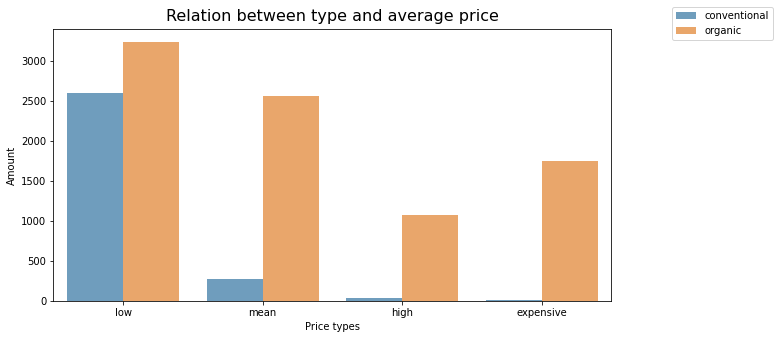

In [18]:
df_count_type = df_filtered.groupby(['price_types', 'type'])['Date'].count().reset_index()

plt.figure(figsize=(10, 5))
sns.countplot(x='price_types', alpha=0.7, hue='type', 
                  data=df_filtered)
plt.legend( bbox_to_anchor=(1.1, 1.1), loc='upper left')
plt.xlabel('Price types'), plt.ylabel('Amount')
plt.title('Relation between type and average price', size=16, y=1.01);

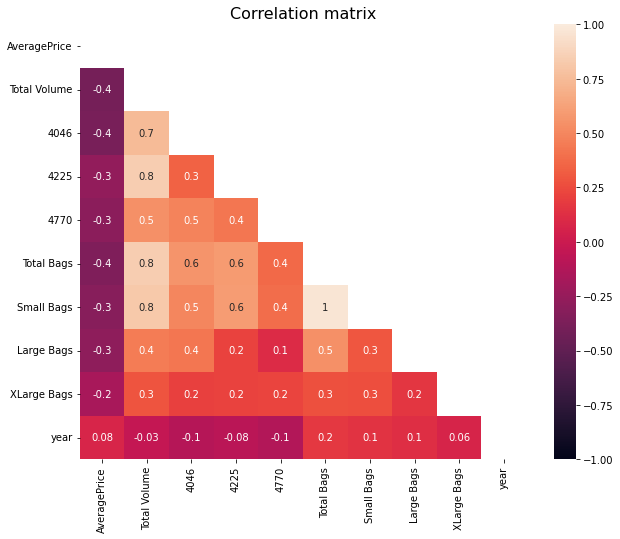

In [19]:
# calculating the correlation matrix
corr = df_filtered.corr()
matrix = np.triu(corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True, mask = matrix)

plt.title('Correlation matrix', size=16)
plt.show()

**Observations about all the above:**
- At the daily and monthly average price we see a decline in price in January 2016-2017. We can conclude that in winter avocados are not in demand, or there were a too much avocados in shops;
- At the average price per year chart we see a steady decline from 2015 to 2016.
- After that there is an increase, the peak is in 2017 year.

In [20]:
df_filtered.to_csv("Filtered_dataset.csv")